In [35]:
import numpy as np
import imageio as io

import matplotlib.pyplot as plt
from skimage import transform
from skimage.color import rgb2gray



In [36]:
plt.rcParams['axes.labelcolor'] = "white"
plt.rcParams['xtick.color'] = "white"
plt.rcParams['ytick.color'] = "white"
plt.rcParams['text.color'] = "white"


In [37]:
img1 = io.imread("imgs/index.jpg")
img2 = io.imread("imgs/index1.jpg")



In [38]:
def cdf(img):
    return np.cumsum(img) / img.size


def adap_hist_matching(source_im, target_im):

    hist1, bins = np.histogram(source_im.flatten(), 256, [0, 256])
    hist2, bins = np.histogram(target_im.flatten(), 256, [0, 256])

    cdf1 = cdf(hist1)
    cdf2 = cdf(hist2)

    pixels = np.arange(256)
    img = np.interp(cdf1, cdf2, pixels)

    return img[source_im.ravel()].reshape(source_im.shape).astype(dtype=np.uint8)


def crop_hist_match(img, im_width, im_height, D, source_im, target_im):
    for x in range(0, im_height, D):
        for y in range(0, im_width, D):
            img[x:x+D, y:y+D] = adap_hist_matching(source_im[x:x+D, y:y+D],
                                                   target_im[x:x+D, y:y+D])
    return img


def partial_adap_hist_matching(source_im, target_im, D):

    if D < 2:
        raise ValueError("Value of D-neckline is too small")

    if len(source_im.shape) == 3:
        print("Source image has been converted to grayscale image")
        gr_source_im = rgb2gray(source_im)
    else:
        gr_source_im = source_im

    if len(target_im) == 3:
        print("Target image has been converted to grayscale image")
        gr_target_im = rgb2gray(target_im)
    else:
        gr_target_im = target_im

    gr_target_im = (transform.resize(gr_target_im, gr_source_im.shape) * 255).astype(dtype=np.uint8)

    height_s = np.size(gr_source_im, 0)
    width_s = np.size(gr_source_im, 1)

    matched_img = np.zeros(shape=gr_source_im.shape)
    matched_img = crop_hist_match(matched_img, width_s, height_s, D, gr_source_im, gr_target_im)

    return matched_img


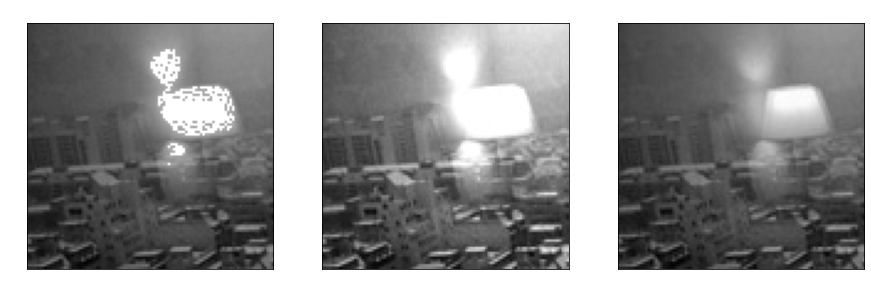

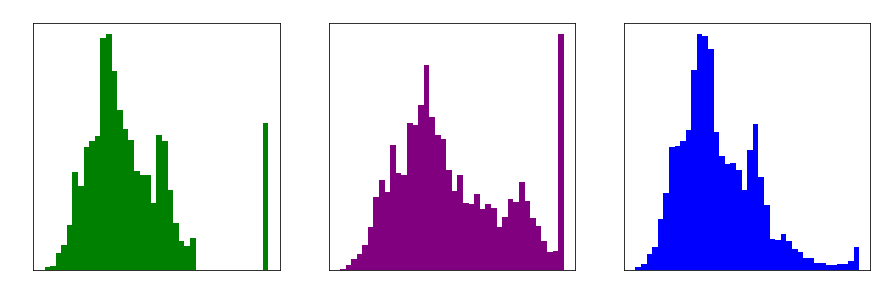

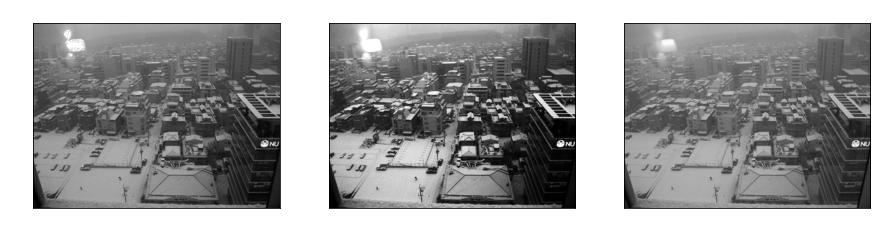

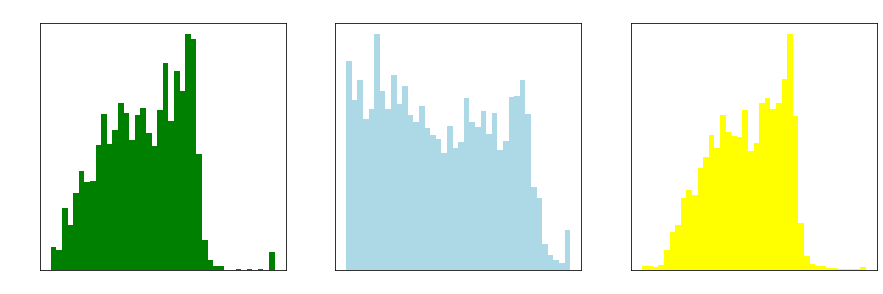

In [40]:
D = 100

img = partial_adap_hist_matching(img2, img1, D)

#--------------image necklines----------------

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.title("Partial matched image neckline")
plt.imshow(img[:D, :D], cmap="gray")

plt.subplot(232)
plt.title("Reference image neckline")
plt.imshow(img2[:D, :D], cmap="gray")

plt.subplot(233)
plt.title("Image neckline to be adjusted")
plt.imshow(img1[:D, :D], cmap="gray")

#-----------------histograms------------------

plt.figure(figsize=(15, 10))
plt.subplot(231)
plt.title("Partial matched image neckline histogram")
plt.hist(img[:D, :D].ravel(), bins=40, histtype="bar", color="green")

plt.subplot(232)
plt.title("Reference image neckline histogram")
plt.hist(img2[:D, :D].ravel(), bins=40, histtype="bar", color="purple")
plt.subplot(233)

plt.title("Image neckline to be adjusted histogram")
plt.hist(img1[:D, :D].ravel(), bins=40, histtype="bar", color="blue")

#------------------images---------------------

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.title("Partial matched image")
plt.imshow(img, cmap="gray")

plt.subplot(232)
plt.title("Reference  image")
plt.imshow(img2, cmap="gray")

plt.subplot(233)
plt.title("Image to be adjusted")
plt.imshow(img1, cmap="gray")

#-----------------histograms------------------

plt.figure(figsize=(15, 10))

plt.subplot(231)
plt.title("Partial matched image histogram")
plt.hist(img.ravel(), bins=40, histtype="bar", color="green")

plt.subplot(232)
plt.title("Reference image histogram")
plt.hist(img2.ravel(), bins=40, histtype="bar", color="lightblue")

plt.subplot(233)
plt.title("Image to be adjusted histogram")
plt.hist(img1.ravel(), bins=40, histtype="bar", color="yellow")

plt.show()
